In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import torch
import torch.nn as nn
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
import gdown

gdown.download_folder('https://drive.google.com/drive/folders/1UKUZZ6uTdEVdGWEKNh0ZRp08pK_AVnrm', output='Download')

Retrieving folder contents


Processing file 1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh images.hdf5
Processing file 19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI metadata
Processing file 1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU Problem Statement
Processing file 1N9oQCi5zklHrv-AXRF6RBiiAzmxc4i2y subject_data.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh
From (redirected): https://drive.google.com/uc?id=1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh&confirm=t&uuid=e81b530d-9cc2-4f3e-be19-dd57c70a4e0e
To: /content/Download/images.hdf5
100%|██████████| 1.30G/1.30G [00:13<00:00, 97.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI
From (redirected): https://docs.google.com/spreadsheets/d/19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI/export?format=xlsx
To: /content/Download/metadata
52.7kB [00:00, 257kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU
From (redirected): https://docs.google.com/document/d/1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU/export?format=docx
To: /content/Download/Problem Statement
78.3kB [00:00, 299kB/s]


['Download/images.hdf5',
 'Download/metadata',
 'Download/Problem Statement',
 'Download/subject_data.csv']

In [ ]:
df = pd.read_csv('Download/subject_data.csv')
print(df)
df.columns

/tmp/ipython-input-2662961776.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Download/subject_data.csv')


             isic_id  target  patient_id  age_approx     sex  \
0       ISIC_0015670       0  IP_1235828        60.0    male   
1       ISIC_0015845       0  IP_8170065        60.0    male   
2       ISIC_0015864       0  IP_6724798        60.0    male   
3       ISIC_0015902       0  IP_4111386        65.0    male   
4       ISIC_0024200       0  IP_8313778        55.0    male   
...              ...     ...         ...         ...     ...   
401054  ISIC_9999937       0  IP_1140263        70.0    male   
401055  ISIC_9999951       0  IP_5678181        60.0    male   
401056  ISIC_9999960       0  IP_0076153        65.0  female   
401057  ISIC_9999964       0  IP_5231513        30.0  female   
401058  ISIC_9999967       0  IP_6426047        50.0    male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up   
1                head/neck                    1.10  TBP tile: close-up   
2        

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [ ]:
df.shape

(401059, 55)

In [ ]:
diagnosis_and_target = [
    'target',
    'iddx_full',
    'iddx_1',
    'iddx_2',
    'iddx_3',
    'iddx_4',
    'iddx_5',
    'mel_mitotic_index',
    'mel_thick_mm',
]

patient_info = [
    'patient_id',
    'age_approx',
    'sex',
    'anatom_site_general',
    'tbp_lv_location',
    'tbp_lv_location_simple',
]

lesion_geometry = [
    'clin_size_long_diam_mm',
    'tbp_lv_areaMM2',
    'tbp_lv_perimeterMM',
    'tbp_lv_minorAxisMM',
    'tbp_lv_eccentricity',
    'tbp_lv_area_perim_ratio',
    'tbp_lv_norm_border',
    'tbp_lv_symm_2axis',
    'tbp_lv_symm_2axis_angle',
]

lesion_color_texture = [
    'tbp_lv_A',
    'tbp_lv_Aext',
    'tbp_lv_B',
    'tbp_lv_Bext',
    'tbp_lv_C',
    'tbp_lv_Cext',
    'tbp_lv_H',
    'tbp_lv_Hext',
    'tbp_lv_L',
    'tbp_lv_Lext',
    'tbp_lv_color_std_mean',
    'tbp_lv_deltaA',
    'tbp_lv_deltaB',
    'tbp_lv_deltaL',
    'tbp_lv_deltaLBnorm',
    'tbp_lv_norm_color',
    'tbp_lv_radial_color_std_max',
    'tbp_lv_stdL',
    'tbp_lv_stdLExt',
]

other_metadata = [
    'isic_id',
    'lesion_id',
    'tbp_lv_dnn_lesion_confidence',
    'tbp_lv_nevi_confidence',
    'image_type',
    'tbp_tile_type',
    'tbp_lv_x',
    'tbp_lv_y',
    'tbp_lv_z',
]

df[patient_info]
df[other_metadata]
df[lesion_color_texture]
df[lesion_geometry]
df[diagnosis_and_target]

,target,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm
0,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
401054,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401055,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401056,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401057,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len((patient_info) +
(other_metadata) +
(lesion_color_texture) +
(lesion_geometry) +
(diagnosis_and_target))

52

In [ ]:
iddx_columns = diagnosis_and_target[1:7]

for col in iddx_columns:
  print("Column:", col)
  print(df[col].value_counts())

Column: iddx_full
iddx_full
Benign                                                                                                                                                           399991
Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark                                                                             228
Benign::Benign melanocytic proliferations::Nevus                                                                                                                    141
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                             98
Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm                                                                               64
Benign::Benign epidermal proliferations::Seborrheic keratosis                                                                       

In [ ]:
df[diagnosis_and_target]

,target,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm
0,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
401054,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401055,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401056,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401057,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# tbp_lv_location provides much more information than any other location-based feature

print(df['tbp_lv_location'].unique())
print(df['tbp_lv_location_simple'].unique())
print(df['anatom_site_general'].unique())

['Right Leg - Upper' 'Head & Neck' 'Torso Back Top Third'
 'Torso Front Top Half' 'Right Arm - Upper' 'Left Leg - Upper'
 'Torso Front Bottom Half' 'Left Arm - Upper' 'Right Leg'
 'Torso Back Middle Third' 'Right Arm - Lower' 'Right Leg - Lower'
 'Left Leg - Lower' 'Left Arm - Lower' 'Unknown' 'Left Leg'
 'Torso Back Bottom Third' 'Left Arm' 'Right Arm' 'Torso Front'
 'Torso Back']
['Right Leg' 'Head & Neck' 'Torso Back' 'Torso Front' 'Right Arm'
 'Left Leg' 'Left Arm' 'Unknown']
['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity' nan]


In [ ]:
# unuseful_columns = ['image_type', 'tbp_lv_location_simple', 'anatom_site_general', 'patient_id', 'lesion_id']

df['tbp_tile_type'].value_counts()

,count
tbp_tile_type,
3D: XP,285903
3D: white,115156


In [ ]:
df.isna().sum()

,0
isic_id,0
target,0
patient_id,0
age_approx,2798
sex,11517
anatom_site_general,5756
clin_size_long_diam_mm,0
image_type,0
tbp_tile_type,0
tbp_lv_A,0


In [ ]:
median_age = df['age_approx'].median()
df['age_approx'].fillna(median_age, inplace=True)
df['sex'].fillna('unknown', inplace=True)

/tmp/ipython-input-1618488571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_approx'].fillna(median_age, inplace=True)
/tmp/ipython-input-1618488571.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df['tbp_lv_x'].value_counts()

,count
tbp_lv_x,
183.481900,3
201.046100,3
178.530000,3
151.513800,3
-135.645100,3
...,...
228.228638,1
158.266541,1
162.981900,1


In [ ]:
# !pip install h5py
import h5py
images_file = 'Download/images.hdf5'


images_hdf5 = h5py.File(images_file, 'r')
img_keys = list(images_hdf5.keys())


def get_img(key):
  if key not in img_keys: return None
  img = Image.open(io.BytesIO(images_hdf5[key][()]))
  return np.array(img)

def get_img_pil(key):
  if key not in img_keys: return None
  return Image.open(io.BytesIO(images_hdf5[key][()]))


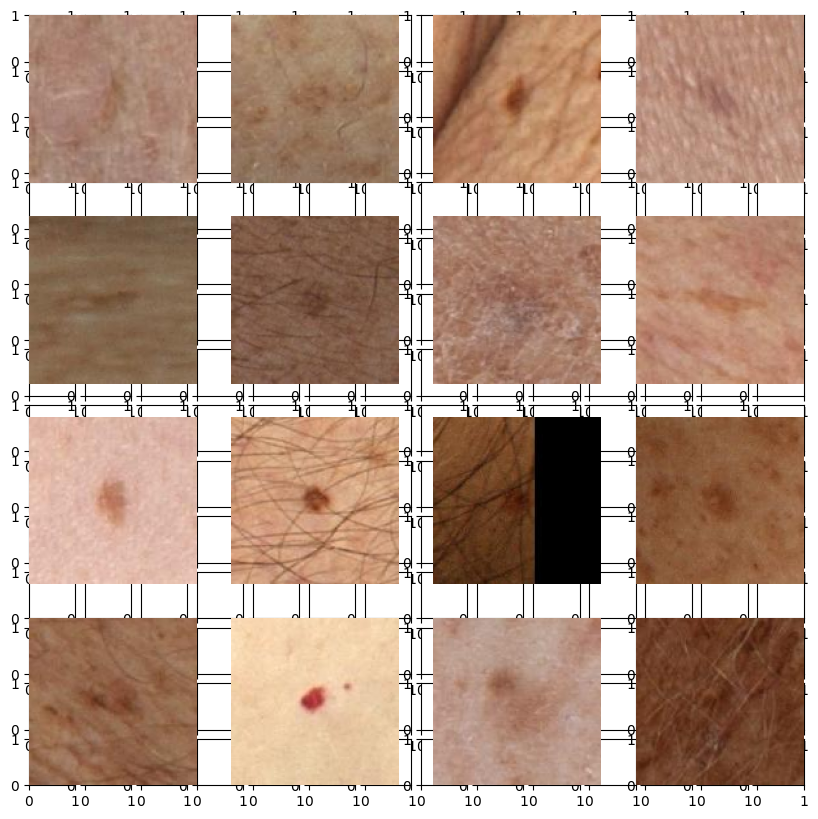

In [ ]:
plt.subplots(14, 14, figsize=(10, 10))

for i in range(4):
  for j in range(4):
    plt.subplot(4, 4, 4*i+j+1)
    plt.imshow(get_img_pil(np.random.choice(img_keys)))
    plt.axis('off')

plt.show()

In [ ]:
patient_info = [
    'patient_id',
    'age_approx',
    'sex',
    'tbp_lv_location',
]

In [ ]:
tabular_features = patient_info + lesion_geometry + lesion_color_texture

numerical_features = lesion_geometry + lesion_color_texture + ['age_approx']
categorical_features = ['sex', 'tbp_lv_location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
tabular_data_preprocessed = preprocessor.fit_transform(df[numerical_features+categorical_features+['isic_id']])
tabular_data_preprocessed.shape

(401059, 54)

In [ ]:
# df[['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']] = df['iddx_full'].str.split('::', expand=True)
iddx_columns = ['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']

# NO

label_encoders = {}
labels_encoded = {}
for col in iddx_columns:
    df[col].fillna('Missing', inplace=True)
    labels_encoded[col], label_encoders[col] = pd.factorize(df[col])

# image_data = np.random.rand(df.shape[0], 139, 139, 3) # Example placeholder

# X_tab_train, X_tab_val, X_img_train, X_img_val, y_train_full, y_val_full = train_test_split(
#     tabular_data_preprocessed,
#     image_data,
#     df[iddx_columns],
#     test_size=0.2,
#     random_state=42
# )

# y_train = {col: labels_encoded[col][y_train_full.index] for col in iddx_columns}
# y_val = {col: labels_encoded[col][y_val_full.index] for col in iddx_columns}

/tmp/ipython-input-2895452490.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Missing', inplace=True)
/tmp/ipython-input-2895452490.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
!pip install hiclass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.9 MB/s eta 0:00:00


Now that `hiclass` is installed, you can use a hierarchical classifier. For this, we need to format the labels correctly for `hiclass` and choose a classifier. We'll use a simple `BalancedRandomForestClassifier` from `hiclass` as an example, but you can explore other options in the library.

In [ ]:
X_tab_train, X_tab_val, y_train_full, y_val_full = train_test_split(
    tabular_data_preprocessed,
    df[iddx_columns],
    test_size=0.2,
    random_state=42
)

In [ ]:
X_tab_train, X_tab_val, y_train_full, y_val_full = train_test_split(
    tabular_data_preprocessed,
    df['target'],
    test_size=0.2,
    random_state=42
)

In [ ]:
y_train_full

,target
18085,0
171181,0
284095,0
354900,0
77679,0
...,...
259178,0
365838,0
131932,0
146867,0


In [ ]:
# from hiclass import LocalClassifierPerNode
# from sklearn.ensemble import RandomForestClassifier
from hiclass import LocalClassifierPerNode
import numpy as np
# Import XGBoost classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

class_counts = df['iddx_1'].value_counts()
total_samples = len(df)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}


sample_weights = np.array([class_weights[label] for label in y_train_full['iddx_1']])


hclf = LocalClassifierPerNode(local_classifier=LGBMClassifier(device='gpu'), n_jobs=-1, verbose=5)

KeyError: 'iddx_1'

In [ ]:
hclf.fit(X_tab_train, y_train_full, sample_weight=sample_weights)

In [ ]:
predict =hclf.predict(X_tab_val)

In [ ]:
(predict == y_val_full).sum() / len(predict)

In [ ]:
df.loc[non_benign_y_val.index]

In [ ]:
non_benign_X_val = X_tab_val[y_val_full['iddx_1'] != 'Benign']
non_benign_y_val = y_val_full[y_val_full['iddx_1'] != 'Benign']

(hclf.predict(non_benign_X_val) == non_benign_y_val).sum() / len(non_benign_X_val)

In [ ]:
import pickle

filename = 'hclf_model.pkl'

with open(filename, 'wb') as f:
    pickle.dump(hclf, f)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.auto import tqdm # Import tqdm

# Data preprocessing for 139x139x3 images
def get_data_transforms():
    """Data augmentation and normalization transforms"""
    train_transforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((139, 139)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(degrees=20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((139, 139)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    return train_transforms, val_transforms

# Model 1: Basic CNN (adapted from the paper)
class BasicCNN(nn.Module):
    """
    Basic CNN model for melanoma classification
    Adapted for 139x139x3 input (instead of 224x224x3)
    """
    def __init__(self, num_classes=2):
        super(BasicCNN, self).__init__()

        # Feature extraction layers
        # First convolutional block - 11x11 filter
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2)  # 139 -> 34
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)  # 34 -> 16

        # Second convolutional block - 5x5 filter
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)  # 16 -> 16
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)  # 16 -> 7

        # Third convolutional block - 3x3 filter
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)  # 7 -> 7

        # Fourth convolutional block - 3x3 filter
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)  # 7 -> 7

        # Fifth convolutional block - 3x3 filter
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)  # 7 -> 7
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)  # 7 -> 3

        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(96)
        self.bn2 = nn.BatchNorm2d(256)
        self.bn3 = nn.BatchNorm2d(384)
        self.bn4 = nn.BatchNorm2d(384)
        self.bn5 = nn.BatchNorm2d(256)

        # Fully connected layers (adapted for 3x3x256 = 2304)
        self.fc1 = nn.Linear(256 * 3 * 3, 4096)
        self.fc2 = nn.Linear(4096, 1000)
        self.fc3 = nn.Linear(1000, num_classes)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Feature extraction
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool3(x)

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)

        # Classification layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

# Model 2: ResNet-18 (adapted from the paper)
class BasicBlock(nn.Module):
    """Basic residual block for ResNet"""
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                              stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                              stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = F.relu(out)

        return out

class ResNet18(nn.Module):
    """
    ResNet-18 model for melanoma classification
    Adapted for 139x139x3 input
    """
    def __init__(self, num_classes=2):
        super(ResNet18, self).__init__()

        # Initial convolution layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 139 -> 70
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)  # 70 -> 35

        # Residual layers
        self.layer1 = self._make_layer(64, 64, 2, stride=1)    # 35x35
        self.layer2 = self._make_layer(64, 128, 2, stride=2)   # 18x18
        self.layer3 = self._make_layer(128, 256, 2, stride=2)  # 9x9
        self.layer4 = self._make_layer(256, 512, 2, stride=2)  # 5x5

        # Global average pooling and fully connected layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(512, 4096)
        self.fc2 = nn.Linear(4096, 10000)
        self.fc3 = nn.Linear(10000, num_classes)
        self.dropout = nn.Dropout(0.5)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

        layers = []
        layers.append(BasicBlock(in_channels, out_channels, stride, downsample))

        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        # Initial convolution
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        # Residual blocks
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # Global average pooling
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

# Model 3: EfficientNet-B0 (adapted from the paper)
class MBConvBlock(nn.Module):
    """Mobile Inverted Bottleneck Convolution Block"""
    def __init__(self, in_channels, out_channels, kernel_size, stride, expand_ratio):
        super(MBConvBlock, self).__init__()
        self.stride = stride
        self.use_residual = stride == 1 and in_channels == out_channels

        # Expansion phase
        expanded_channels = in_channels * expand_ratio
        self.expand_conv = nn.Conv2d(in_channels, expanded_channels, 1, bias=False) if expand_ratio != 1 else None
        self.expand_bn = nn.BatchNorm2d(expanded_channels) if expand_ratio != 1 else None

        # Depthwise convolution
        self.depthwise_conv = nn.Conv2d(expanded_channels, expanded_channels, kernel_size,
                                       stride, padding=kernel_size//2, groups=expanded_channels, bias=False)
        self.depthwise_bn = nn.BatchNorm2d(expanded_channels)

        # Squeeze-and-excitation (simplified)
        self.se_reduce = nn.Conv2d(expanded_channels, expanded_channels // 4, 1)
        self.se_expand = nn.Conv2d(expanded_channels // 4, expanded_channels, 1)

        # Pointwise convolution
        self.pointwise_conv = nn.Conv2d(expanded_channels, out_channels, 1, bias=False)
        self.pointwise_bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        identity = x

        # Expansion
        if self.expand_conv is not None:
            x = self.swish(self.expand_bn(self.expand_conv(x)))

        # Depthwise
        x = self.swish(self.depthwise_bn(self.depthwise_conv(x)))

        # Squeeze-and-excitation
        se = F.adaptive_avg_pool2d(x, 1)
        se = torch.sigmoid(self.se_expand(F.relu(self.se_reduce(se))))
        x = x * se

        # Pointwise
        x = self.pointwise_bn(self.pointwise_conv(x))

        # Residual connection
        if self.use_residual:
            x = x + identity

        return x

    def swish(self, x):
        return x * torch.sigmoid(x)

class EfficientNetB0(nn.Module):
    """
    EfficientNet-B0 model for melanoma classification
    Adapted for 139x139x3 input
    """
    def __init__(self, num_classes=2):
        super(EfficientNetB0, self).__init__()

        # Initial convolution layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1, bias=False)  # 139 -> 70
        self.bn1 = nn.BatchNorm2d(32)

        # MBConv blocks (adapted for 139x139 input)
        self.mbconv1 = MBConvBlock(32, 16, 3, 1, 1)     # 70x70
        self.mbconv2 = MBConvBlock(16, 24, 3, 2, 6)     # 35x35
        self.mbconv3 = MBConvBlock(24, 24, 3, 1, 6)     # 35x35
        self.mbconv4 = MBConvBlock(24, 40, 5, 2, 6)     # 18x18
        self.mbconv5 = MBConvBlock(40, 40, 5, 1, 6)     # 18x18
        self.mbconv6 = MBConvBlock(40, 80, 3, 2, 6)     # 9x9
        self.mbconv7 = MBConvBlock(80, 80, 3, 1, 6)     # 9x9
        self.mbconv8 = MBConvBlock(80, 80, 3, 1, 6)     # 9x9
        self.mbconv9 = MBConvBlock(80, 112, 5, 1, 6)    # 9x9
        self.mbconv10 = MBConvBlock(112, 112, 5, 1, 6)  # 9x9
        self.mbconv11 = MBConvBlock(112, 112, 5, 1, 6)  # 9x9
        self.mbconv12 = MBConvBlock(112, 192, 5, 2, 6)  # 5x5
        self.mbconv13 = MBConvBlock(192, 192, 5, 1, 6)  # 5x5
        self.mbconv14 = MBConvBlock(192, 192, 5, 1, 6)  # 5x5
        self.mbconv15 = MBConvBlock(192, 192, 5, 1, 6)  # 5x5
        self.mbconv16 = MBConvBlock(192, 320, 3, 1, 6)  # 5x5

        # Final convolution
        self.conv2 = nn.Conv2d(320, 1280, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(1280)

        # Global average pooling and classifier
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(1280, num_classes)

    def swish(self, x):
        return x * torch.sigmoid(x)

    def forward(self, x):
        # Initial convolution
        x = self.swish(self.bn1(self.conv1(x)))

        # MBConv blocks
        x = self.mbconv1(x)
        x = self.mbconv2(x)
        x = self.mbconv3(x)
        x = self.mbconv4(x)
        x = self.mbconv5(x)
        x = self.mbconv6(x)
        x = self.mbconv7(x)
        x = self.mbconv8(x)
        x = self.mbconv9(x)
        x = self.mbconv10(x)
        x = self.mbconv11(x)
        x = self.mbconv12(x)
        x = self.mbconv13(x)
        x = self.mbconv14(x)
        x = self.mbconv15(x)
        x = self.mbconv16(x)

        # Final convolution
        x = self.swish(self.bn2(self.conv2(x)))

        # Global average pooling and classification
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

# Training function
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=0.001, class_weights=None):
    """Training function for any of the three models with class weighting and tqdm"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Use class weights if provided
    if class_weights is not None:
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
    else:
        criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        # Wrap the train_loader with tqdm for a progress bar
        train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]', leave=False)
        for batch_idx, (data, target) in enumerate(train_loader_tqdm):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()

            train_loader_tqdm.set_postfix({'loss': f'{train_loss/(batch_idx+1):.4f}',
                                          'acc': f'{100.*train_correct/train_total:.2f}%'})


        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            val_loader_tqdm = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', leave=False)
            for data, target in val_loader_tqdm:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)

                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()

                val_loader_tqdm.set_postfix({'loss': f'{val_loss/(val_total/val_loader.batch_size):.4f}',
                                           'acc': f'{100.*val_correct/val_total:.2f}%'})


        train_acc = 100. * train_correct / train_total
        val_acc = 100. * val_correct / val_total
        train_loss = train_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        scheduler.step(val_loss)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('-' * 50)

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader):
    """Comprehensive evaluation function matching paper metrics"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='binary')
    recall = recall_score(all_targets, all_predictions, average='binary')  # Sensitivity
    f1 = f1_score(all_targets, all_predictions, average='binary')

    cm = confusion_matrix(all_targets, all_predictions)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    geometric_mean = np.sqrt(recall * specificity)

    error_rate = 1 - accuracy

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall/Sensitivity: {recall:.4f} ({recall*100:.2f}%)")
    print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
    print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
    print(f"Matthews Correlation Coefficient: {mcc:.4f} ({mcc*100:.2f}%)")
    print(f"Geometric Mean: {geometric_mean:.4f}")
    print(f"Error Rate: {error_rate:.4f} ({error_rate*100:.2f}%)")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1,
        'mcc': mcc,
        'geometric_mean': geometric_mean,
        'error_rate': error_rate
    }

In [ ]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch
import pandas as pd
import numpy as np
import io
from PIL import Image
import h5py

# Assuming images_file and get_img function are defined as in your previous cell
# images_file = 'Download/images.hdf5'
# images = h5py.File(images_file, 'r')
# img_keys = list(images.keys())
# def get_img(key):
#   if key not in img_keys: return None
#   return Image.open(io.BytesIO(images[key][()]))


class MelanomaDataset(Dataset):
    """Custom Dataset for loading melanoma images and binary labels."""
    def __init__(self, dataframe, get_img_function, transforms=None):
        """
        Args:
            dataframe (pandas.DataFrame): DataFrame containing image IDs and labels.
            get_img_function (callable): Function to load image data given an image ID.
            transforms (callable, optional): Optional transform to be applied on an image.
        """
        self.dataframe = dataframe
        self.get_img = get_img_function
        self.transforms = transforms
        self.label_column = 'target'

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_id = self.dataframe.iloc[idx]['isic_id']
        image = self.get_img(img_id)

        if self.transforms:
            image = self.transforms(image)

        label = self.dataframe.iloc[idx][self.label_column]
        label_tensor = torch.tensor(label, dtype=torch.long)

        return image, label_tensor

# Create df_train and df_val using the indices from y_train_full and y_val_full
# Assuming y_train_full and y_val_full are pandas DataFrames or Series with indices corresponding to df
train_indices = y_train_full.index
val_indices = y_val_full.index

df_train = df.loc[train_indices].copy().reset_index(drop=True)
df_val = df.loc[val_indices].copy().reset_index(drop=True)

# Now, proceed with creating datasets and dataloaders using the defined dataframes
train_transforms, val_transforms = get_data_transforms()

# Create dataset instances
train_dataset = MelanomaDataset(df_train, get_img, transforms=train_transforms)
val_dataset = MelanomaDataset(df_val, get_img, transforms=val_transforms)

# Calculate weights for oversampling the minority class
class_counts = df_train['target'].value_counts()
class_weights = 1. / class_counts
sample_weights = class_weights[df_train['target']]

# Create a WeightedRandomSampler for the training data
sampler = WeightedRandomSampler(
    weights=sample_weights.values,
    num_samples=len(sample_weights), # Sample as many times as there are samples
    replacement=True # Sample with replacement
)

# Create DataLoader instances
BATCH_SIZE = 32
# Use the sampler for the training loader, and set shuffle=False
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False) # No sampler for validation

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Train loader batch size: {train_loader.batch_size}")
print(f"Validation loader batch size: {val_loader.batch_size}")

# Verify by iterating through a batch
print("\nVerifying data loader output shapes:")
for images, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

for images, labels in val_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

In [ ]:
efficientnet_b0_model = EfficientNetB0(num_classes=2) # Set num_classes to 2 for binary classification

num_epochs = 10
learning_rate = 0.001

class_counts = y_train_full.value_counts()
total_samples = len(y_train_full)
class_weights = [total_samples / (2 * class_counts[0]), total_samples / (2 * class_counts[1])]
print(f"Calculated class weights: {class_weights}")

print(f"Starting training of EfficientNet-B0 for {num_epochs} epochs with class weights...")
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    efficientnet_b0_model,
    train_loader,
    val_loader,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    class_weights=class_weights
)

print("\nTraining finished.")

Calculated class weights: [np.float64(0.5004976164328857), np.float64(502.8949843260188)]
Starting training of EfficientNet-B0 for 10 epochs with class weights...


Epoch 1/10 [Train]:   0%|          | 0/10027 [00:00<?, ?it/s]

Epoch 1/10 [Val]:   0%|          | 0/2507 [00:00<?, ?it/s]

Epoch [1/10]
Train Loss: 0.0079, Train Acc: 50.00%
Val Loss: 5.1160, Val Acc: 0.09%
--------------------------------------------------


Epoch 2/10 [Train]:   0%|          | 0/10027 [00:00<?, ?it/s]